In [2]:
G = DiGraph()

In [33]:
#Where d is the height of the box, j is the width, and n is the number to fit in the box.
d = 4
j = 4
start = [0,0,0,0]

In [54]:
# def generate_children(d, j, blocks):
#     children = []
#     if blocks == [0,0,0,0]:
#         return[[1,0,0,0]]
#     for i in range(j - 1):
#         if blocks[i] < j and blocks[i] != 0:
#             children.append(blocks.insert(i, blocks[i] +1 ))
#         elif blocks[i] == 0 and blocks[i - 1] != 0:
#             children.append(blocks.insert(i, blocks[i] +1 ))
# #             print("you should have made it here")
#     return children 
        
    
def generate_children(d, j, blocks):
    children = []
    if blocks == [0, 0, 0, 0]:
        return [[1, 0, 0, 0]]
    for i in range(j - 1):
        if blocks[i] < j and blocks[i] != 0: ##don't include if the i + 1 > i 
            new_blocks = blocks.copy()
            new_blocks[i] += 1
            children.append(new_blocks)
        elif blocks[i] == 0 and blocks[i - 1] != 0:
            new_blocks = blocks.copy()
            new_blocks[i] += 1
            children.append(new_blocks)
            # print("you should have made it here")
    return children

    

In [56]:
c = generate_children(d, j, start)
a = generate_children(d, j, c[0])
b = generate_children(d, j, a[1])
print(a, b)

[[2, 0, 0, 0], [1, 1, 0, 0]] [[2, 1, 0, 0], [1, 2, 0, 0], [1, 1, 1, 0]]


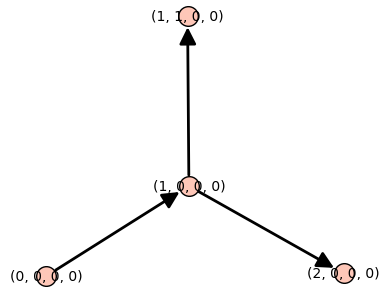

In [65]:
G.add_vertex(tuple(start))
for v in generate_children(d, j, start):
    G.add_edge(tuple(start), tuple(v))


for child in generate_children(d, j, start):
    for v in generate_children(d, j, child):
        G.add_edge(tuple(child), tuple(v))
G.show()

In [66]:
g = DiGraph()
blocks = [0,0,0,0]

def add_edges_recursive(graph, blocks, d, j):
    for child in generate_children(d, j, blocks):
        graph.add_edge(tuple(blocks), tuple(child))
        add_edges_recursive(graph, child, d, j)

In [67]:
add_edges_recursive(g, blocks, d, j)

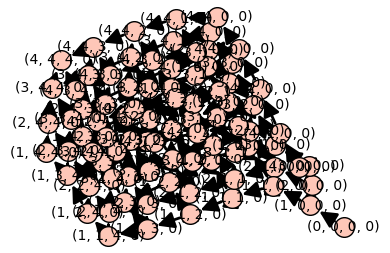

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [80]:
g.show()
import networkx as nx
nx.drawing.nx_agraph.write_dot(G, "output.dot")
